https://github.com/derekbanas/tensorflow

https://youtu.be/_5D4I4QddCY


## Imports

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from keras.utils.vis_utils import plot_model

if (tf.config.list_physical_devices('GPU')):
    print("GPU is available")



GPU is available


## Download data

In [2]:
# nba_data = pd.read_csv('nba_salary_stats.csv')
nba_data = pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv')
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


## Delete Unknown Values

In [3]:
nba_data.isna().sum()
nba_data = nba_data.dropna()

## Delete Unneeded Data

In [12]:
nba_data_numeric = nba_data.copy()
del nba_data_numeric['first_name']
del nba_data_numeric['last_name']
del nba_data_numeric['team']
del nba_data_numeric['pos']
nba_data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


## Convert Currency to Float

In [5]:
def clean_currency(curr):
    if isinstance(curr, str):
        return (curr.replace('$', '').replace(',', ''))
    return (curr)

In [6]:
nba_data_numeric['salary'] = nba_data_numeric['salary'].apply(clean_currency).astype('float')
nba_data_numeric.head()

,team,salary,pos,age,g,gs,mp,fg,fga,fg%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,TOR,2711280.0,C,22,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,MIA,28103550.0,C,24,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
2,BRK,2641691.0,C,36,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
3,MIL,4054695.0,SG,26,66,61,1805,255,569,0.448,...,0.865,32,190,222,100,46,18,43,96,733
4,CLE,20000000.0,C,23,56,56,1809,369,545,0.677,...,0.708,192,410,602,92,44,75,94,97,904


In [7]:
print(np.shape(nba_data_numeric))

(289, 29)


In [8]:
print(nba_data_numeric.describe())

             salary         age           g          gs           mp   
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000  \
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...   
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...  \
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.231000    0.000

## Box Plots

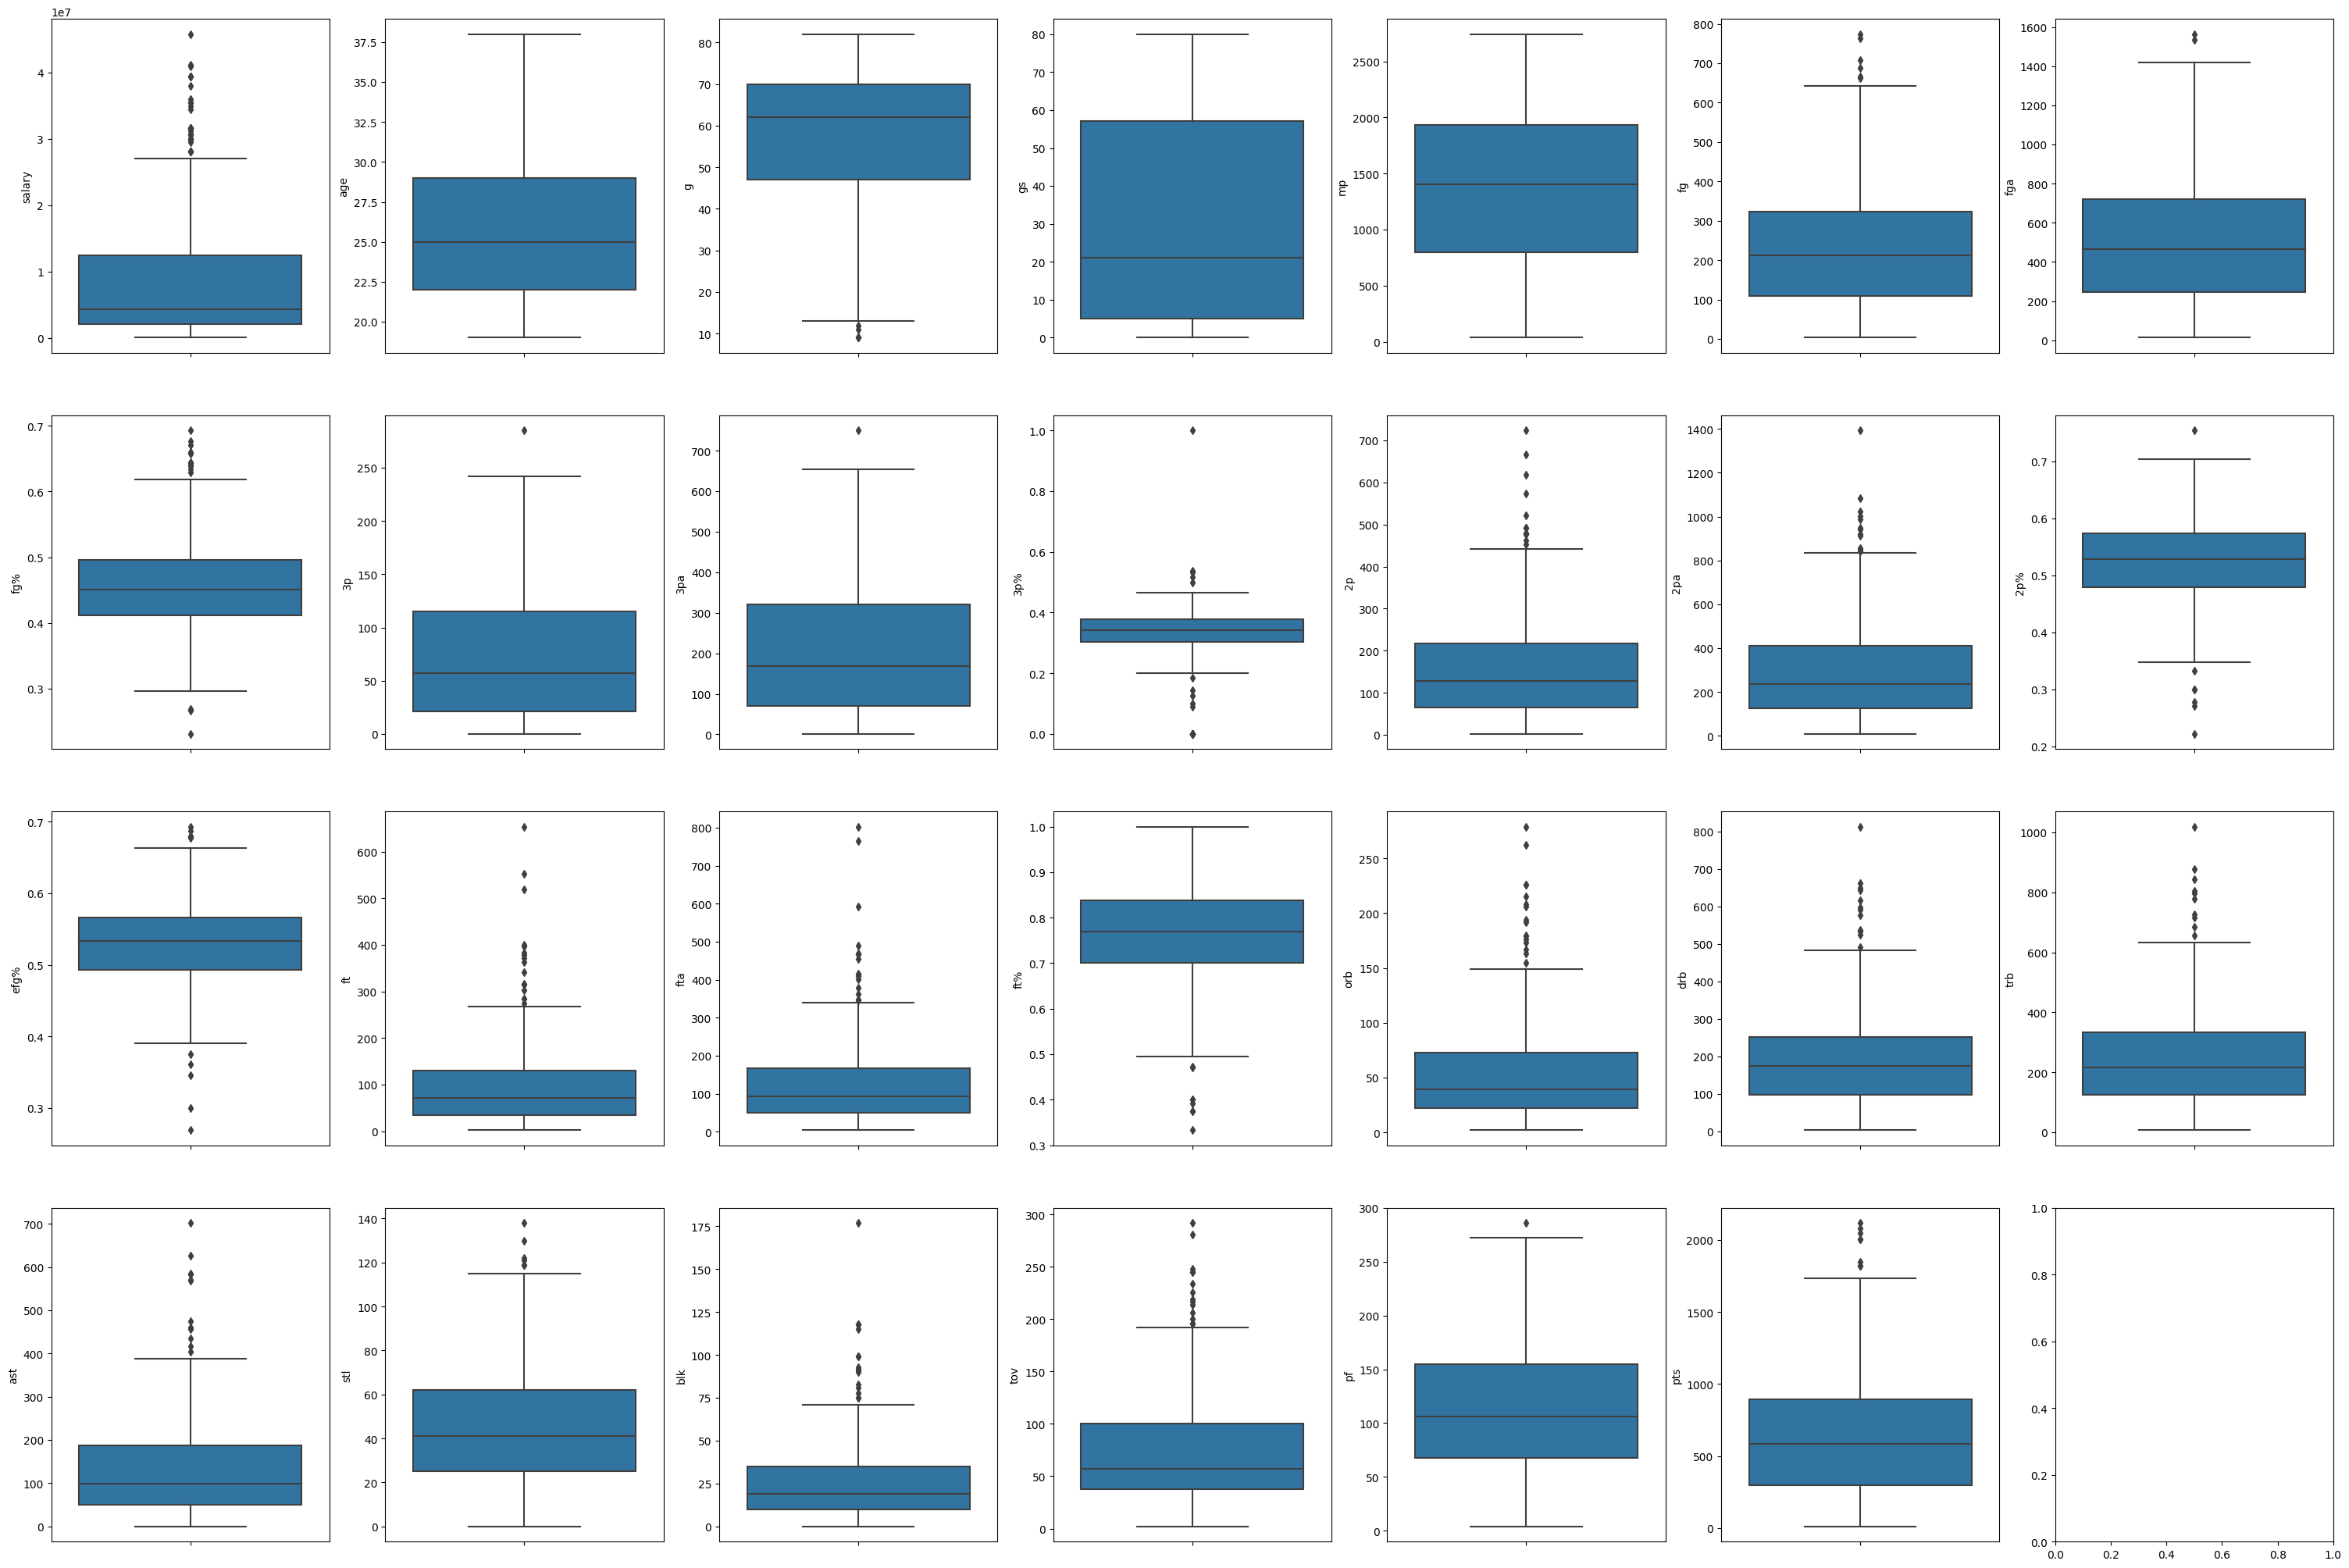

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()

for k, v in nba_data_numeric.items():
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

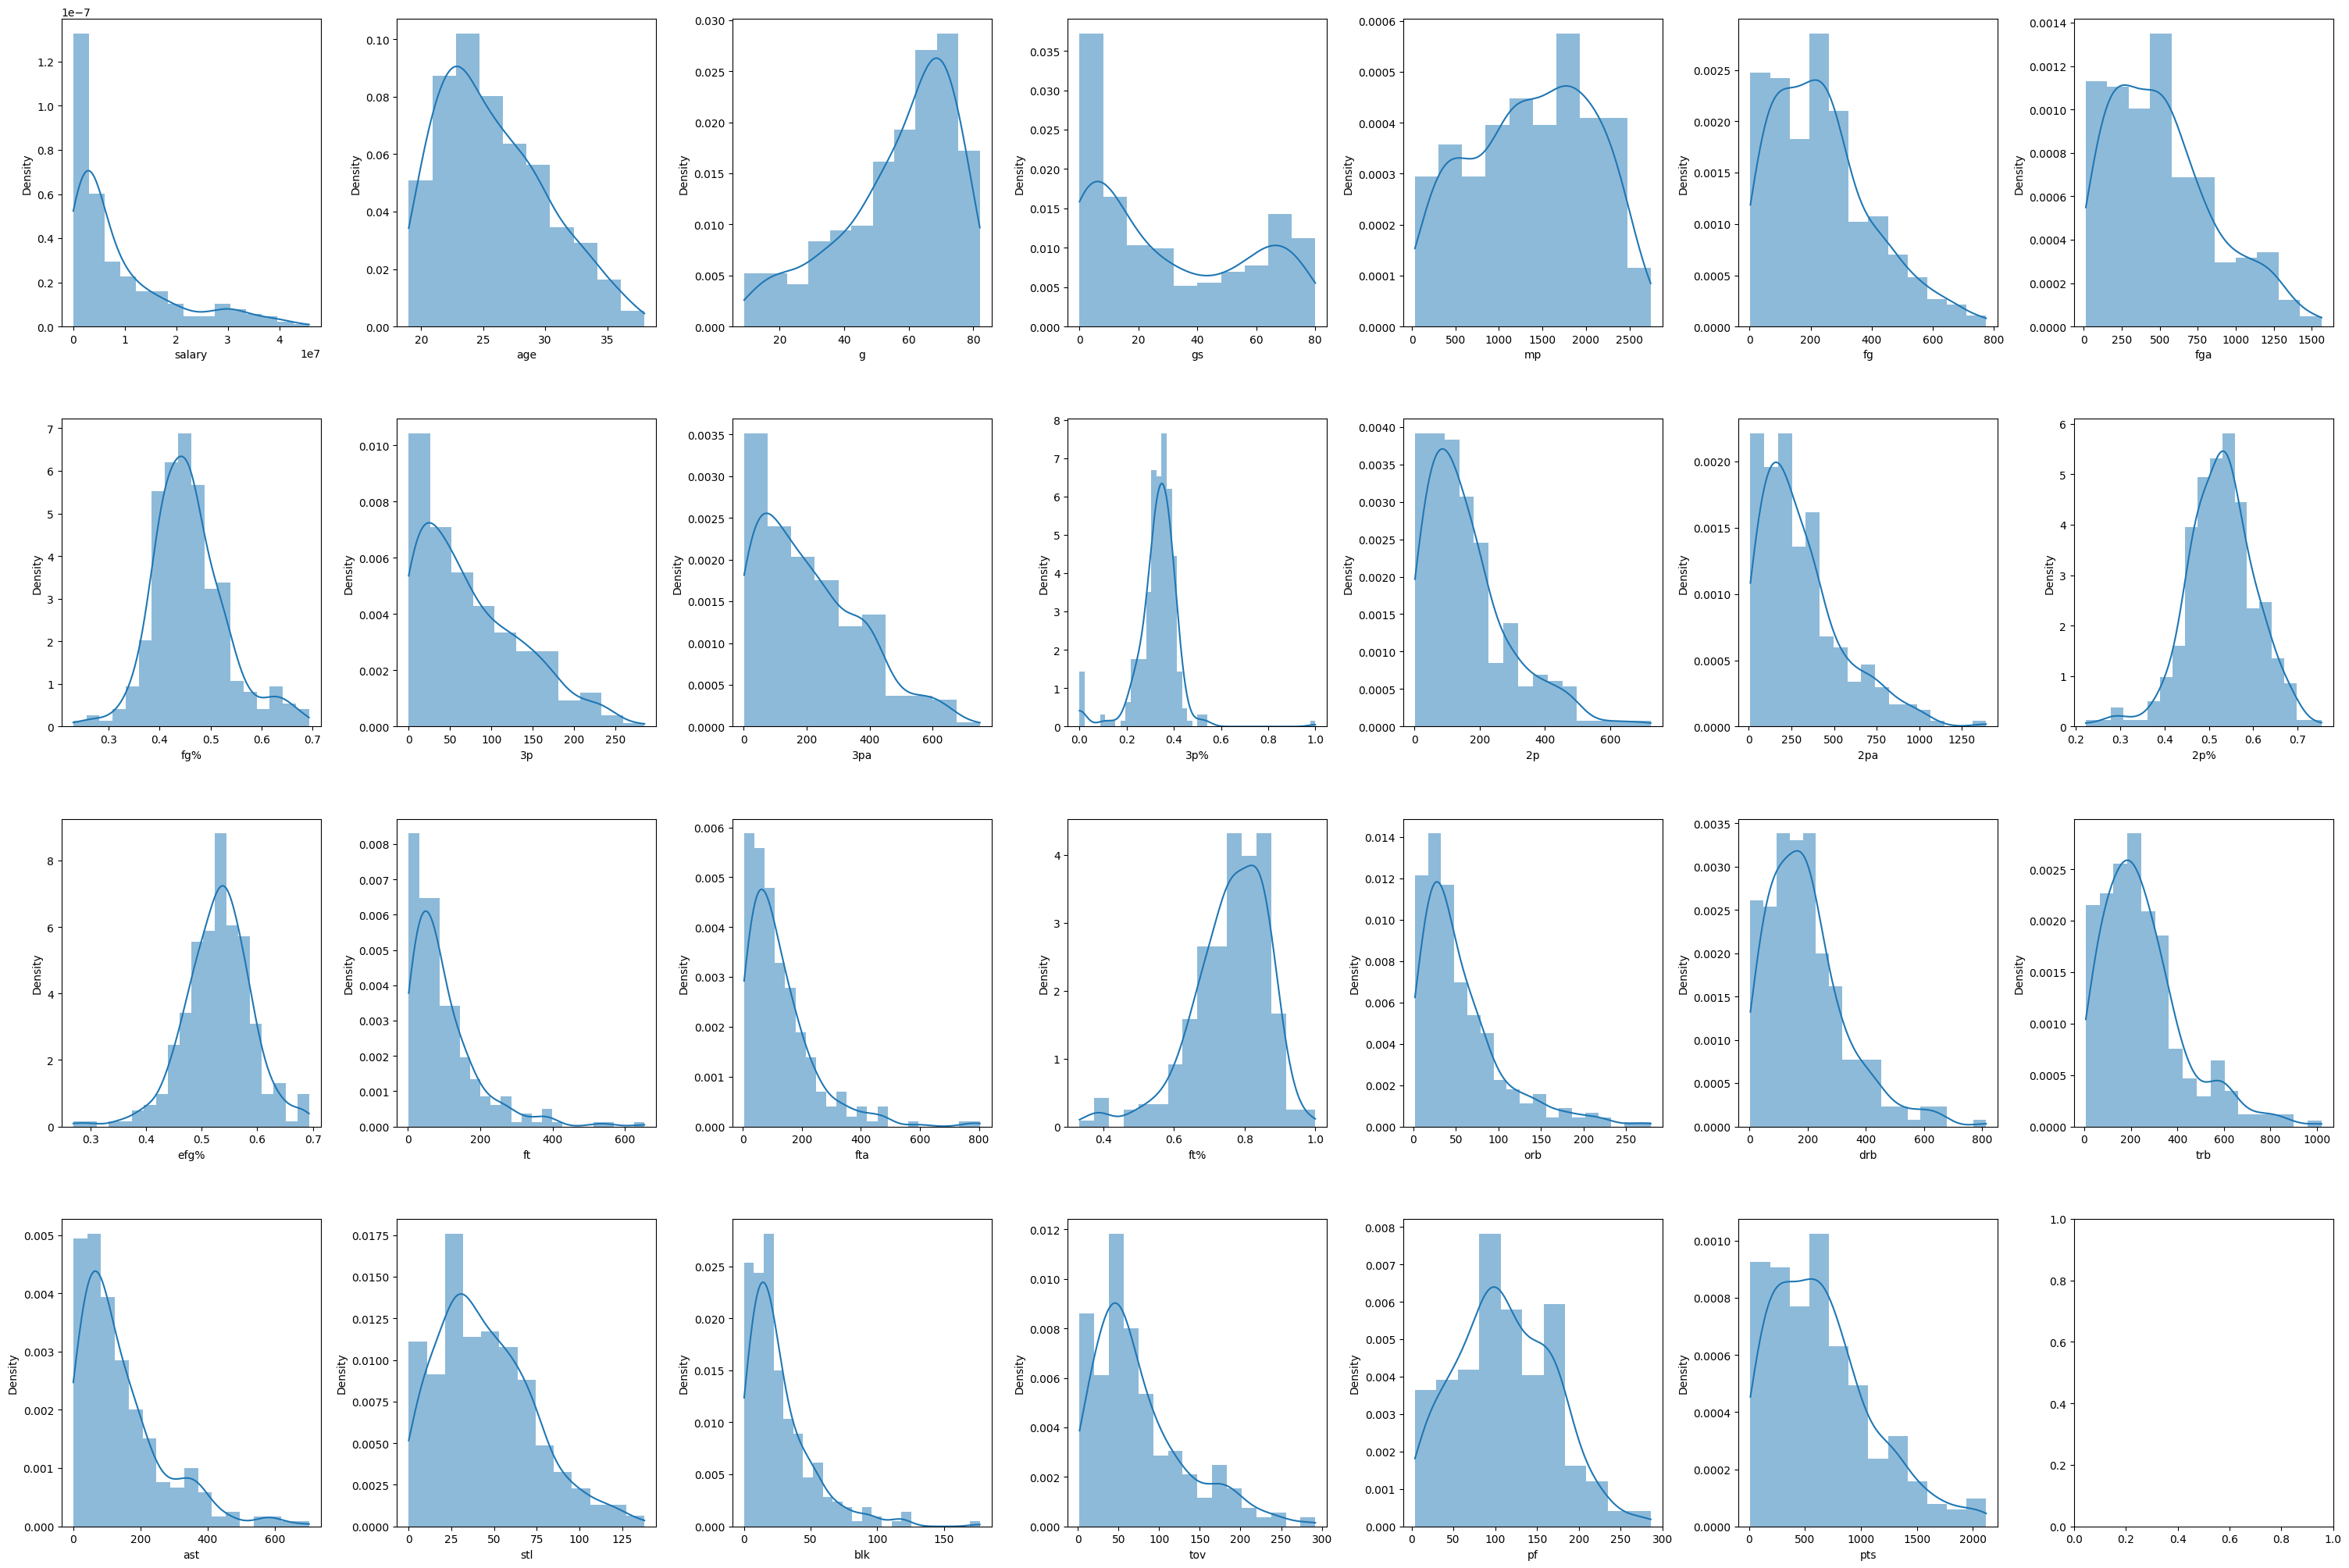

In [16]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()

for k, v in nba_data_numeric.items():
    sns.histplot(v, ax=axs[index], kde=True, stat="density", linewidth=0)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Correlation Matrix

<Axes: >

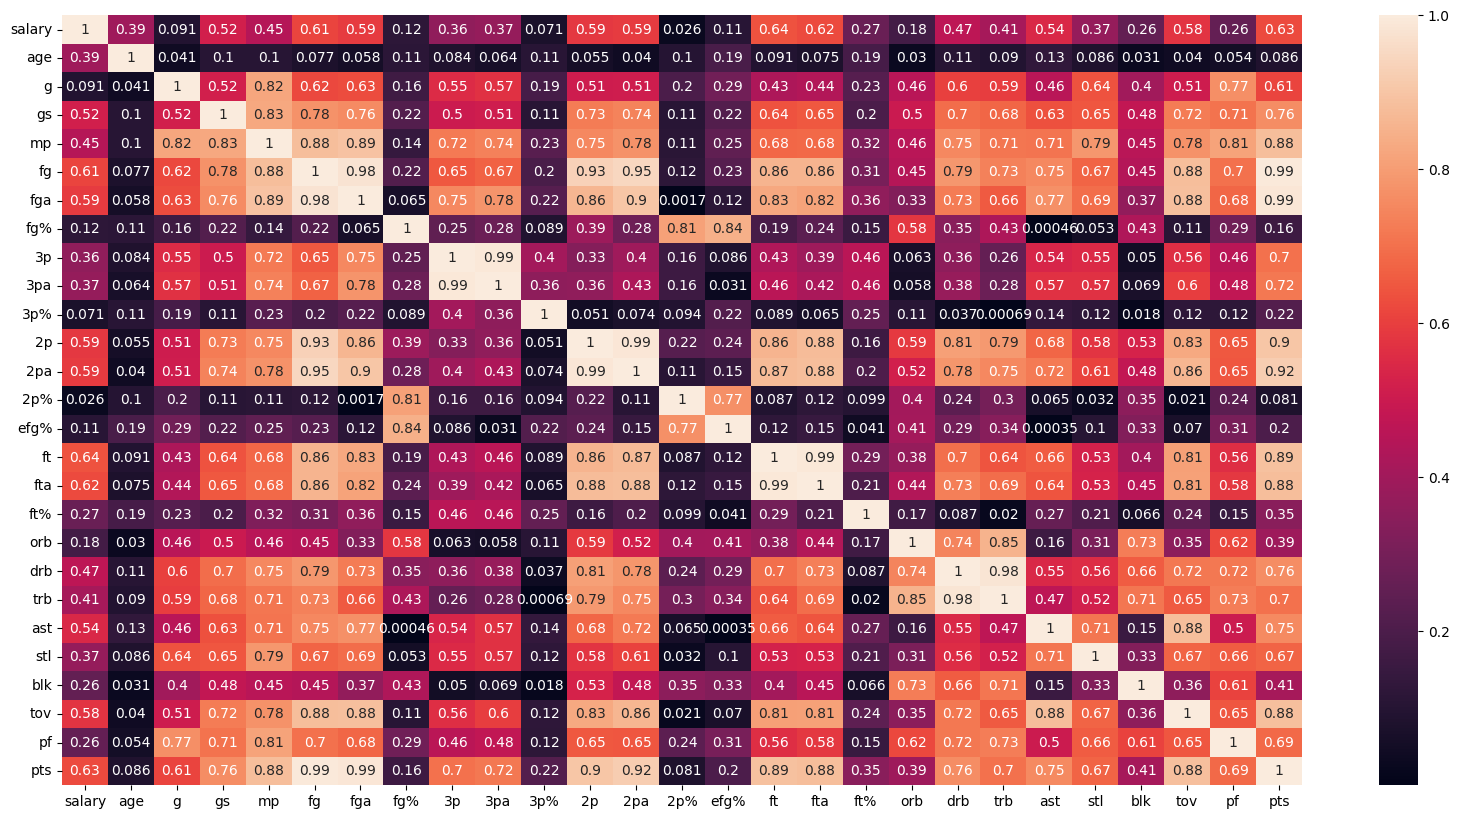

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True)


## Get Percentage of Outliers

In [20]:
for k, v in nba_data_numeric.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column salary outliers = 9.69%
Column age outliers = 0.00%
Column g outliers = 1.73%
Column gs outliers = 0.00%
Column mp outliers = 0.00%
Column fg outliers = 2.08%
Column fga outliers = 0.69%
Column fg% outliers = 4.84%
Column 3p outliers = 0.35%
Column 3pa outliers = 0.35%
Column 3p% outliers = 6.57%
Column 2p outliers = 4.50%
Column 2pa outliers = 4.15%
Column 2p% outliers = 2.42%
Column efg% outliers = 3.81%
Column ft outliers = 5.54%
Column fta outliers = 5.54%
Column ft% outliers = 2.77%
Column orb outliers = 5.54%
Column drb outliers = 4.15%
Column trb outliers = 3.46%
Column ast outliers = 4.15%
Column stl outliers = 2.08%
Column blk outliers = 5.54%
Column tov outliers = 4.84%
Column pf outliers = 0.35%
Column pts outliers = 2.77%


## Tensorflow Neural Network Regressions

## Tensors

### Create Constant Tensor

In [21]:
scalar = tf.constant(5)
scalar

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



<tf.Tensor: shape=(), dtype=int32, numpy=5>

### Create a Vector

In [22]:
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

### Create Matrix

In [23]:
matrix = tf.constant([[1, 2], [3, 4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

### Create a Tensor

In [25]:
tensor = tf.constant([[[1, 2], 
                        [3, 4]], 
                        [[5, 6], 
                        [7, 8]]])
tensor

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]], dtype=int32)>

### Create Tensor that can be changed

In [27]:
v_tensor = tf.Variable([1, 2])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

### Get & Change Values

In [30]:
print("Index 0: ", v_tensor[0])
v_tensor[0].assign(8)
print("Index 0: ", v_tensor[0])

Index 0:  tf.Tensor(2, shape=(), dtype=int32)
Index 0:  tf.Tensor(8, shape=(), dtype=int32)


### Random Tensors

In [33]:
rand_tensor = tf.random.Generator.from_seed(42)
rand_tensor = rand_tensor.normal(shape=(3, 2), mean=0.0, stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.75658023, -0.06854693],
       [ 0.07595028, -1.2573844 ],
       [-0.23193759, -1.8107857 ]], dtype=float32)>

### Turn Numpy Array into Tensor

In [34]:
np_array = np.arange(1, 25, dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [35]:
tensor2 = tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)>

### Change Shape of Tensor

In [38]:
# 6 * 2 * 2 = 24
tensor3 = tf.constant(np_array, shape=(6, 2, 2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]], dtype=int32)>

### Get Info on Tensors

In [42]:
print("Index 0: ", tensor3[:1])
print("Values in Dims: ", tensor3.shape)
print("Dimensions: ", tensor3.ndim)
print("Total Values: ", tf.size(tensor3).numpy())
print("Data Type: ", tensor3.dtype)

Index 0:  tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Values in Dims:  (6, 2, 2)
Dimensions:  3
Total Values:  24
Data Type:  <dtype: 'int32'>


### Matrix Multiplication

DOT PRODUCT : Matrix Multiplication

Multiply matching numbers and sum them
Take each row in the left matrix, multiply it by the columns in the right matrix and sum
- Multiply and sum 1st row and 1st column (Position 0, 0)
- 1st row and 2nd column (Position 0, 1)
- 2nd row and first column (Position 1, 0)
- 2nd row and 2nd column (Position 1, 1)

$$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \quad
x  \quad
\begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} \quad
=  \quad
\begin{bmatrix} 1*1 + 2*3 + 3*5 & 1*2 + 2*4 + 3*6 \\ 4*1 + 5*3 + 6*5 & 4*2 + 5*4 + 6*6 \end{bmatrix} \quad
= \quad
\begin{bmatrix} 22 & 28 \\ 49 & 64 \end{bmatrix}
$$

The dimension of the resulting matrix with be the number of rows from 1st (2x3) and the number of columns from the 2nd (3x2) matrix

You can only perform this calculation if the 1st matrix has an equal number of columns to the number rows in the 2nd

### Why is Matrix Multiplication Useful

Let's say these are sales at our ice cream store

| Flavor | Sat  | Sun | Tues | Wed | Thr | Fri |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Choc | 26 | 27 | 22 | 10 | 12 | 33 |
| Van | 18 | 21 | 10 | 8 | 4 | 26 |
| Straw | 9 | 20 | 4 | 9 | 7 | 16 |
| Chip | 24 | 19 | 12 | 8 | 6 | 14 |

And this is how much each ice cream costs

| Choc | Van  | Straw | Chip | 
| :---: | :---: | :---: | :---: |
| $3 | $2 | $4 | $4 |

We can find earnings on each day with matrix multiplication

In [44]:
ic_sales = tf.constant([[26 , 27 , 22 , 10 , 12 , 33],
                        [18 , 21 , 10 , 8 , 4 , 26],
                        [9 , 20 , 4 , 9 , 7 , 16],
                        [24 , 19 , 12 , 8 , 6 , 14]])
ic_sales

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[26, 27, 22, 10, 12, 33],
       [18, 21, 10,  8,  4, 26],
       [ 9, 20,  4,  9,  7, 16],
       [24, 19, 12,  8,  6, 14]], dtype=int32)>

In [45]:
ic_prices = tf.constant([[3, 2, 4, 4]])
ic_prices

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]], dtype=int32)>

In [47]:
tf.matmul(ic_prices, ic_sales)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]], dtype=int32)>

## Normalize and One Hot Encode Our Data

In [85]:
''' BASIC
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "pts"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["pos"]) # One hot encode these columns (pos, team)
)
'''

''' NBA Efficiency
ct = make_column_transformer(
    (MinMaxScaler(), ["pts", "trb", "ast", "stl", "blk", "fg%", "ft%", "tov", "g"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["pos"]) # One hot encode these columns (pos, team)
)
'''

''' Everything
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "g", "gs", "mp", "fg", "fga", "fg%", "3p", "3pa", "3p%", "2p", "2pa", "2p%", "efg%", "ft", "fta", "ft%", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["team", "pos"]) # One hot encode these columns (pos, team)
)
'''

# High correlation features fg, ft, fta, tov, pts
ct = make_column_transformer(
    (MinMaxScaler(), ["fg", "ft", "fta", "tov", "pts"]), # Normalize these columns
)

## Separate Features and Labels

In [86]:
X = nba_data.drop('salary', axis=1) # Features (NBA Stats)
y = nba_data['salary'] # Label (Player Salary)

## Separate Training & Testing Data

In [87]:
# trainning 80% & Testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

## Transform Training & Test Data

In [88]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## Our New Normalized and One Hot Encoded Data

In [89]:
X_train_normal

array([[0.0843061 , 0.04141104, 0.04380476, 0.1       , 0.07787274],
       [0.66018158, 0.46165644, 0.49687109, 0.83793103, 0.68138651],
       [0.44747082, 0.25613497, 0.24906133, 0.45862069, 0.43494777],
       ...,
       [0.47600519, 0.1196319 , 0.20650814, 0.14482759, 0.38366572],
       [0.29442283, 0.16104294, 0.1514393 , 0.28965517, 0.32573599],
       [0.17250324, 0.06748466, 0.07133917, 0.14827586, 0.15337132]])

## Build Neural Network with Training Data

In [90]:
tf.random.set_seed(66)

nba_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

nba_model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01), 
    metrics=['mae']
)

fit_data = nba_model.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [91]:
nba_data_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 27ms/step - loss: 4549246.0000 - mae: 4549246.0000


## Plot to see How Increasing Epochs Decreases Loss

<Axes: xlabel='Epochs', ylabel='Loss'>

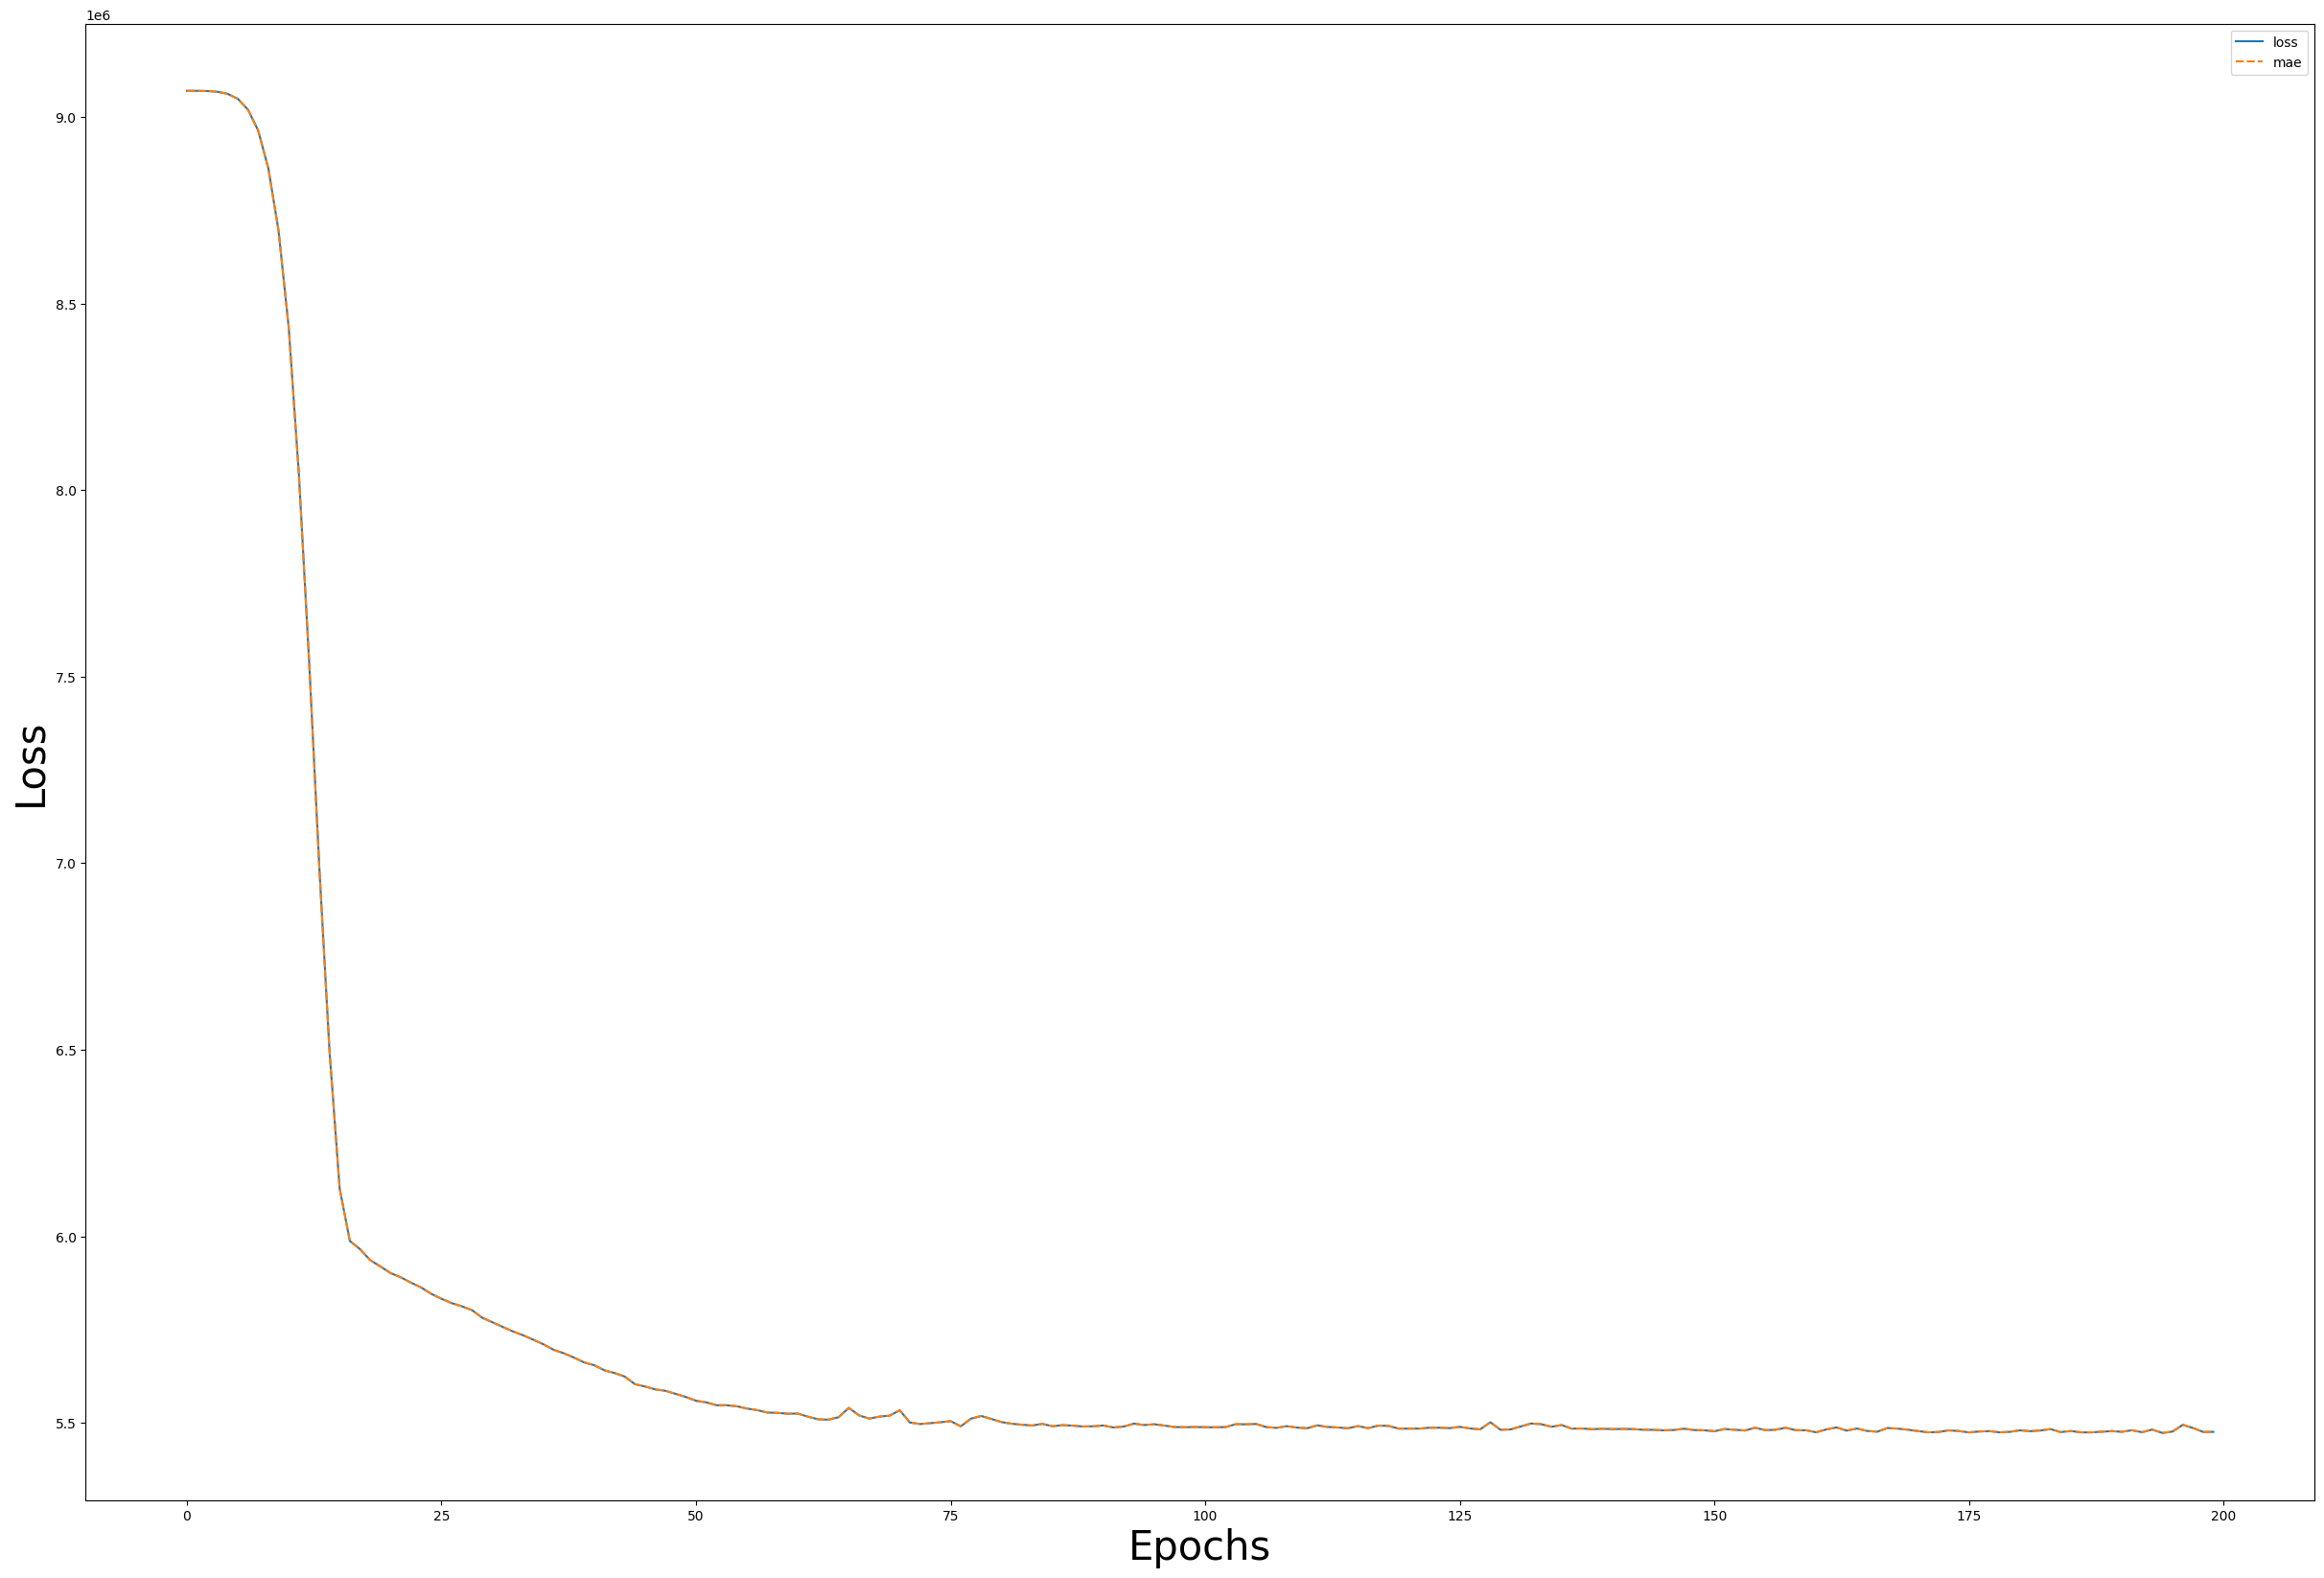

In [92]:
plt.figure(figsize=(30, 20))
plt.ylabel(ylabel='Loss', fontsize=30)
plt.xlabel(xlabel='Epochs', fontsize=30)
sns.lineplot(data=fit_data.history)